### 非医療的介入の緩和モデル
SIRモデルで，感染が拡がっていくために設定したパラメータを各時間で変えることのできるようにする。
このシミュレーションでは，一定の期間を区切って，介入の強さを周期的に変化させる。周期的な政府の介入により，外出の自粛または禁止が発令され，cが変化する場合を考える。また，日本のように自粛が要請で，平日ではなかなか介入がうまく機能しないという現状についても考える。


わかりやすいように，7日間のうち，週末だけ介入するモデルを作成する。



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

beta_init=0.09 #0.09 #rate of infection
gamma=0.7 #recovery rate

In [2]:
num_of_days=50

day_ranges=[]
betaList=[]
CList=[]

inf=[]
sus=[]
rec=[]

#C, betaの設定．変更のタイミングは揃える必要がある．何度でも変更できる
#day0-day50: beta=betainit*100%, C=30
day_ranges.append(range(0,21))#0から数える，endは+1する
b=list(day_ranges[-1])
b=[beta_init for i in day_ranges[-1]]
betaList.append(b)
#the number of person to meet/contact
c=list(day_ranges[-1])  
c=[30 for i in day_ranges[-1]]
CList.append(c)

#day 31-day50: beta=betainit*70%, C=20
day_ranges.append(range(21,num_of_days+1))#endは+1する
b=list(day_ranges[-1])
b=[beta_init*0.7 for i in day_ranges[-1]]
betaList.append(b)
c=list(day_ranges[-1])
c=[20 for i in day_ranges[-1]]
CList.append(c)

def calc(betaLists, CLists):
    I=1
    R=0
    S=9273000 # the number of people without immunity
    alpha=I/(S+I+R)

    t=0
    for i, day_range in enumerate(day_ranges):
        CList=CLists[i]
        betaList=betaLists[i]
        r=0
        for j in range(0, i): r+=len(day_ranges[j])-1
        inf_tmp=[]
        sus_tmp=[]
        rec_tmp=[]
        #inf_tmp=[None for x in range(0,r)]
        #sus_tmp=[None for x in range(0,r)]
        #rec_tmp=[None for x in range(0,r)]
        ##print("#len of none:"+str(len(inf_tmp)))
        #print("#"+str(day_range))
        #print("#r:"+str(r))
        for k, beta in enumerate(betaList):
            C=CList[k]
            #print("day",[x for x in day_range][k],beta, C)
            alpha=I/(S+I+R)#infection rate of contact person
            new_R=I*gamma
            new_I=S*C*alpha*beta
            if new_I<0:
                new_I=0
            I=I+new_I-new_R
            R=R+new_R
            S=S-new_I
            if S<=0:
                S=0
            inf_tmp.append(I)
            sus_tmp.append(S)
            rec_tmp.append(R)
            #print("day:"+str(t))
            t+=1
        inf.append(inf_tmp)
        sus.append(sus_tmp)
        rec.append(rec_tmp)
        
      
#実行
calc(betaList, CList)

#plot
#print(len(range(0, len(inf[0])+len(inf[1])-1)))
#plt.plot(range(0, len(inf[0])-1), inf[0],label='infection beta='+str(beta_init))
#plt.plot(range(len(inf[0]), len(inf[0])+len(inf[1])-1), inf[1],label='infection beta='+str(beta_init*0.7))

#for line in range(len(inf)):
#  plt.plot(inf[line],label='infection'+str(line))
#  plt.plot(rec[line],label='recover'+str(line))
#  plt.plot(sus[line],label='susceptible'+str(line))
#plt.plot(inf[0]+inf[1],label='infection')
#plt.plot(rec[0]+rec[1],label='recover')
#plt.plot(sus[0]+sus[1],label='susceptible')
#for item in inf: plt.plot(item,label='infection')
#for item in sus: plt.plot(item,label='susceptible')
#for item in rec: plt.plot(item,label='recover')

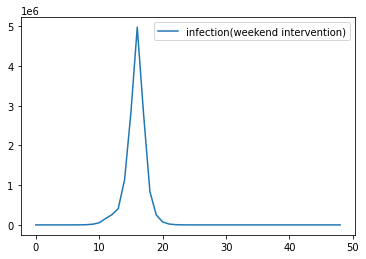

In [3]:
#C, betaの設定．変更のタイミングは揃える必要がある．何度でも変更できる
#さらに別の世界(初期から条件設定が異なる)と比較する場合は下記のように=[]で変数をクリーニングしてからやりなおす
#この同じドキュメント内では上下のプログラムを参照できるのでこのブロックでもplt.plot()やcalc()ができる


day_ranges=[]
betaList=[]
CList=[]
inf=[]
sus=[]
rec=[]

#7 weeks
for week in range(0,7):
  #day0-day4
  day_ranges.append(range(week*7+0,week*7+5))#0から数える，endは+1する
  b=list(day_ranges[-1])
  b=[beta_init for i in day_ranges[-1]]
  betaList.append(b)
  c=list(day_ranges[-1])
  c=[30  for i in day_ranges[-1]]
  CList.append(c)

  #day 5-day6: 週末C=15
  day_ranges.append(range(week*7+5,week*7+7))#endは+1する
  b=list(day_ranges[-1])
  b=[beta_init for i in day_ranges[-1]]
  betaList.append(b)
  c=list(day_ranges[-1])
  c=[15 for i in day_ranges[-1]]
  CList.append(c)

calc(betaList, CList)

inf_all=[]
rec_all=[]
sus_all=[]

for i in range(len(inf)):
  inf_all+=inf[i]
  rec_all+=rec[i]
  sus_all+=sus[i]
plt.plot(inf_all,label='infection(weekend intervention)')
#plt.plot(rec_all,label='recover')
#plt.plot(sus_all,label='susceptible')
plt.legend()

比較のため，介入のなかった場合の感染者数の推移を重ねてみる。

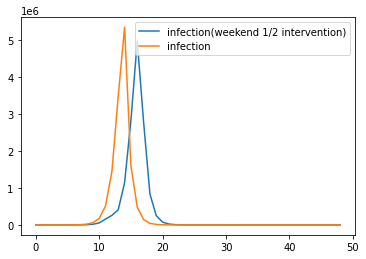

In [4]:
#常にC=30
inf=[]
sus=[]
rec=[]
day_ranges=[]
betaList=[]
CList=[]
for week in range(0,7):
  #day0-day4
  day_ranges.append(range(week*7+0,week*7+7))#0から数える，endは+1する
  b=list(day_ranges[-1])
  b=[beta_init for i in day_ranges[-1]]
  betaList.append(b)
  c=list(day_ranges[-1])
  c=[30  for i in day_ranges[-1]]
  CList.append(c)

calc(betaList, CList)

inf_all2=[]
rec_all2=[]
sus_all2=[]

for i in range(len(inf)):
  inf_all2+=inf[i]
  rec_all2+=rec[i]
  sus_all2+=sus[i]
plt.plot(inf_all,label='infection(weekend 1/2 intervention)')
plt.plot(inf_all2,label='infection')
#plt.plot(rec_all2,label='recover')
#plt.plot(sus_all2,label='susceptible')
plt.legend()

週末だけ，50％削減した介入（たとえば人と会う数を30人から15人にする）では，ピークを遅らせることはできるものの，その高さは低くすることができなかった。


介入を強め，25％まで削減してみる。

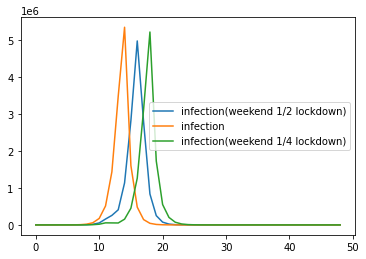

In [5]:
# 週末C=7.5
inf=[]
sus=[]
rec=[]
day_ranges=[]
betaList=[]
CList=[]
for week in range(0,7):
  #day0-day4: weekday
  day_ranges.append(range(week*7+0,week*7+5))#0から数える，endは+1する
  b=list(day_ranges[-1])
  b=[beta_init for i in day_ranges[-1]]
  betaList.append(b)
  c=list(day_ranges[-1])
  c=[30  for i in day_ranges[-1]]
  CList.append(c)

  #day 5-day6: weekend:
  day_ranges.append(range(week*7+5,week*7+7))#endは+1する
  b=list(day_ranges[-1])
  b=[beta_init for i in day_ranges[-1]]
  betaList.append(b)
  c=list(day_ranges[-1])
  c=[7.5 for i in day_ranges[-1]]
  CList.append(c)

calc(betaList, CList)

inf_all3=[]
rec_all3=[]
sus_all3=[]

for i in range(len(inf)):
  inf_all3+=inf[i]
  rec_all3+=rec[i]
  sus_all3+=sus[i]

plt.plot(inf_all,label='infection(weekend 1/2 lockdown)')
plt.plot(inf_all2,label='infection')
plt.plot(inf_all3,label='infection(weekend 1/4 lockdown)')
#plt.plot(rec_all2,label='recover')
#plt.plot(sus_all2,label='susceptible')
plt.legend()

普段の25％まで（1日に7.5人）削減した。この場合でも，ピークを遅らせることはできるものの，50％の削減と同様の感染者数をだしてしまっている。

もっと厳しい介入が必要なのだろうか。

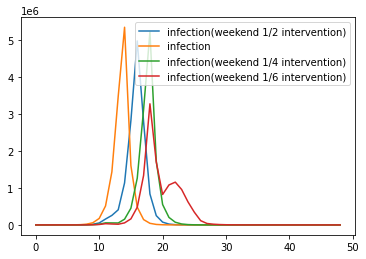

In [6]:
# 週末C=3.75
inf=[]
sus=[]
rec=[]
day_ranges=[]
betaList=[]
CList=[]
for week in range(0,7):
  #day0-day4: weekday
  day_ranges.append(range(week*7+0,week*7+5))#0から数える，endは+1する
  b=list(day_ranges[-1])
  b=[beta_init for i in day_ranges[-1]]
  betaList.append(b)
  c=list(day_ranges[-1])
  c=[30  for i in day_ranges[-1]]
  CList.append(c)

  #day 5-day6: weekend: 変化なし
  day_ranges.append(range(week*7+5,week*7+7))#endは+1する
  b=list(day_ranges[-1])
  b=[beta_init for i in day_ranges[-1]]
  betaList.append(b)
  c=list(day_ranges[-1])
  c=[5 for i in day_ranges[-1]]
  CList.append(c)

calc(betaList, CList)

inf_all4=[]
rec_all4=[]
sus_all4=[]

for i in range(len(inf)):
  inf_all4+=inf[i]
  rec_all4+=rec[i]
  sus_all4+=sus[i]

plt.plot(inf_all,label='infection(weekend 1/2 intervention)')
plt.plot(inf_all2,label='infection')
plt.plot(inf_all3,label='infection(weekend 1/4 intervention)')
plt.plot(inf_all4,label='infection(weekend 1/6 intervention)')
#plt.plot(rec_all2,label='recover')
#plt.plot(sus_all2,label='susceptible')
plt.legend()

普段の15%（1日に5人）まで削減したところ，ピークは遅れ，高さも低くすることができた。

### 8.2 2つのピーク
15％まで削減することで得られたグラフには，2つのピークがあるという興味深い特徴がある。このピークについて考えるために1%まで削減した場合のシミュレーションをする。

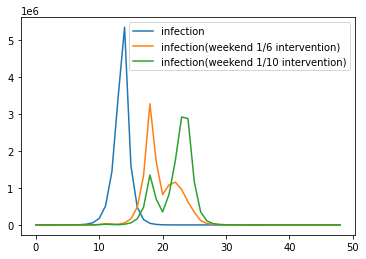

In [7]:
# 週末C=3.75
inf=[]
sus=[]
rec=[]
day_ranges=[]
betaList=[]
CList=[]
for week in range(0,7):
  #day0-day4: weekday
  day_ranges.append(range(week*7+0,week*7+5))#0から数える，endは+1する
  b=list(day_ranges[-1])
  b=[beta_init for i in day_ranges[-1]]
  betaList.append(b)
  c=list(day_ranges[-1])
  c=[30  for i in day_ranges[-1]]
  CList.append(c)

  #day 5-day6: weekend: 変化なし
  day_ranges.append(range(week*7+5,week*7+7))#endは+1する
  b=list(day_ranges[-1])
  b=[beta_init for i in day_ranges[-1]]
  betaList.append(b)
  c=list(day_ranges[-1])
  c=[3 for i in day_ranges[-1]]
  CList.append(c)

calc(betaList, CList)

inf_all5=[]
rec_all5=[]
sus_all5=[]

for i in range(len(inf)):
  inf_all5+=inf[i]
  rec_all5+=rec[i]
  sus_all5+=sus[i]

#plt.plot(inf_all,label='infection(weekend 1/2 intervention)')
plt.plot(inf_all2,label='infection')
#plt.plot(inf_all3,label='infection(weekend 1/4 intervention)')
plt.plot(inf_all4,label='infection(weekend 1/6 intervention)')
plt.plot(inf_all5,label='infection(weekend 1/10 intervention)')
#plt.plot(rec_all2,label='recover')
#plt.plot(sus_all2,label='susceptible')
plt.legend()

先に得られた2つのピークと比べ，今回は2回目の波の高さが高くなった。

### 8.3 介入の緩和モデル
今回シミュレーションしたモデルは，介入の緩和モデルとしてとらえることができる。
7日間のうち2日間の介入としてはじめは考えていたが，dayをweekに読み替えることで，7週のうち，5週間介入が実施され，2週間介入が行われない，という，長期にわたる介入のモデルとして捉え直すことができる。

### 8.4 介入の実効性，そして未来

以上から，政府による非医療的介入においては，とても強い制限を課さなければパンデミックに対して効果がないことが示唆される。最低限の社会活動を残し，自宅に一定期間隔離（social distancing)するなど，徹底的な介入でなければ，このモデルにおいては，普段の1割に迫るCを実現すること，そして基本再生産数が1を切ることは実現できない。

また，その介入が短期間で終わってしまうと，感染が再興してしまう現象が起きることも示唆される。そして，重要なのは，感染症を押さえ込むための介入は，流行の波を1回で終わらせないかもしれないということだ。現実には2回ではなく，何度も波が来，その度に介入をする必要がある可能性がある。パンデミックは一度の大きな流行では終わらないのである。
